In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
qualityLevels=['Ex','Gd','TA','Fa','Po']
def oneHotFeats(df,header,vals):
    catch = [header]
    for quality in vals:
        newFeat = header +"Is" + str(quality)
        df[newFeat] = 1*(df[header] == quality)
        catch.append(newFeat)
    return catch
def dummie(df,header,vals):
    c = oneHotFeats(df,header,vals)
    df.drop(columns=[header],inplace=True)

In [33]:

df = pd.read_csv("yolo.csv")
df.drop(columns=["Alley"],inplace=True)
df.drop(columns=["MoSold"],inplace=True)
headers = list(df)


dummie(df,"BsmtQual",qualityLevels)
dummie(df,"BsmtCond",qualityLevels)
dummie(df,"BsmtExposure",["Gd","Av","Mn","No"])
dummie(df,"BsmtFinType1",["GLQ","ALQ","BLQ","Rec","LwQ","Unf"])
dummie(df,"BsmtFinType2",["GLQ","ALQ","BLQ","Rec","LwQ","Unf"])
dummie(df,"FireplaceQu",qualityLevels)
dummie(df,"GarageType",["2Types", "Attchd", "Basment", "BuiltIn", "CarPort", "Detchd"])
dummie(df,"GarageFinish",["Fin","RFn","Unf"])
#df["GarageNewness"] = df.GarageYrBlt - 1864 + (2018 - df.YrSold)
#df.GarageNewness.fillna(0,inplace=True)
df.drop(columns=["GarageYrBlt"],inplace=True)
dummie(df,"GarageQual",qualityLevels)
dummie(df,"GarageCond",qualityLevels)
dummie(df,"PoolQC",qualityLevels)
dummie(df,"Fence",["GdPrv", "MnPrv", "GdWo", "MnWw"])


In [34]:
headers=list(df)
whatIsPossible = {}
for header in headers:
    ser = df[header]
    if ser.dtype == "object":
        whatIsPossible[header] = list(ser.unique())
        dummie(df,header,whatIsPossible[header])

whatIsPossible["MSSubClass"]=[20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190]    
dummie(df,"MSSubClass",whatIsPossible["MSSubClass"])
print(whatIsPossible)

{'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH'], 'Street': ['Pave', 'Grvl'], 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'], 'LandContour': ['Lvl', 'Bnk', 'Low', 'HLS'], 'Utilities': ['AllPub', 'NoSeWa'], 'LotConfig': ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], 'LandSlope': ['Gtl', 'Mod', 'Sev'], 'Neighborhood': ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste'], 'Condition1': ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe'], 'Condition2': ['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'], 'BldgType': ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], 'HouseStyle': ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin'], 'RoofStyle': ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], 'RoofMatl': ['CompShg'

In [35]:
df = pd.read_csv("yoloTest.csv")
df.drop(columns=["Alley"],inplace=True)
df.drop(columns=["MoSold"],inplace=True)
headers = list(df)


dummie(df,"BsmtQual",qualityLevels)
dummie(df,"BsmtCond",qualityLevels)
dummie(df,"BsmtExposure",["Gd","Av","Mn","No"])
dummie(df,"BsmtFinType1",["GLQ","ALQ","BLQ","Rec","LwQ","Unf"])
dummie(df,"BsmtFinType2",["GLQ","ALQ","BLQ","Rec","LwQ","Unf"])
dummie(df,"FireplaceQu",qualityLevels)
dummie(df,"GarageType",["2Types", "Attchd", "Basment", "BuiltIn", "CarPort", "Detchd"])
dummie(df,"GarageFinish",["Fin","RFn","Unf"])
#df["GarageNewness"] = df.GarageYrBlt - 1864 + (2018 - df.YrSold)
#df.GarageNewness.fillna(0,inplace=True)
df.drop(columns=["GarageYrBlt"],inplace=True)
dummie(df,"GarageQual",qualityLevels)
dummie(df,"GarageCond",qualityLevels)
dummie(df,"PoolQC",qualityLevels)
dummie(df,"Fence",["GdPrv", "MnPrv", "GdWo", "MnWw"])


headers=list(df)
for header in headers:
    ser = df[header]
    if ser.dtype == "object":
        dummie(df,header,whatIsPossible[header])

dummie(df,"MSSubClass",whatIsPossible["MSSubClass"])


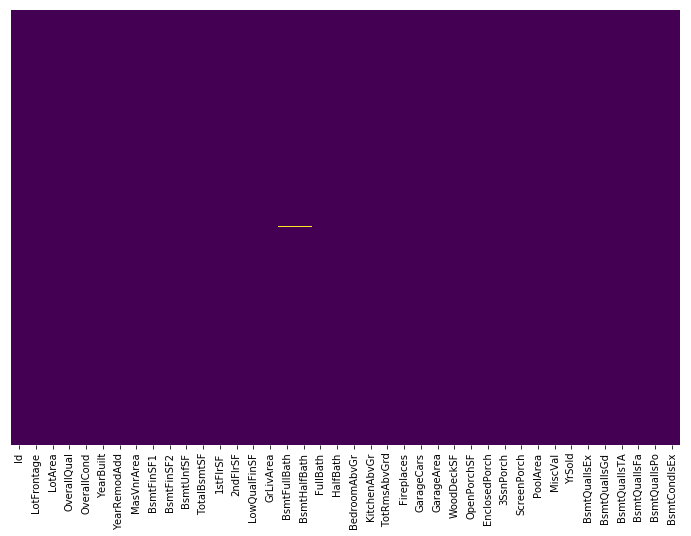

In [11]:
headers = list(df)
plt.figure(figsize=(12,8))
sns.heatmap(df.loc[:,headers[0:40]].isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.show()

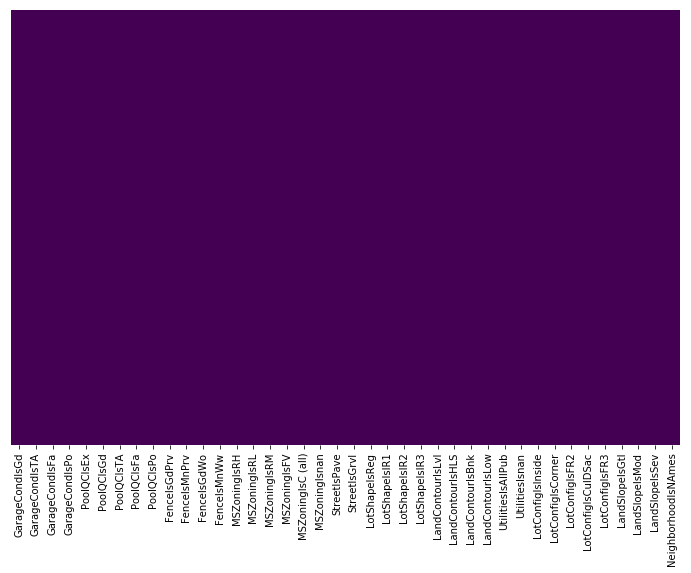

In [12]:
headers = list(df)
plt.figure(figsize=(12,8))
sns.heatmap(df.loc[:,headers[80:120]].isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.show()

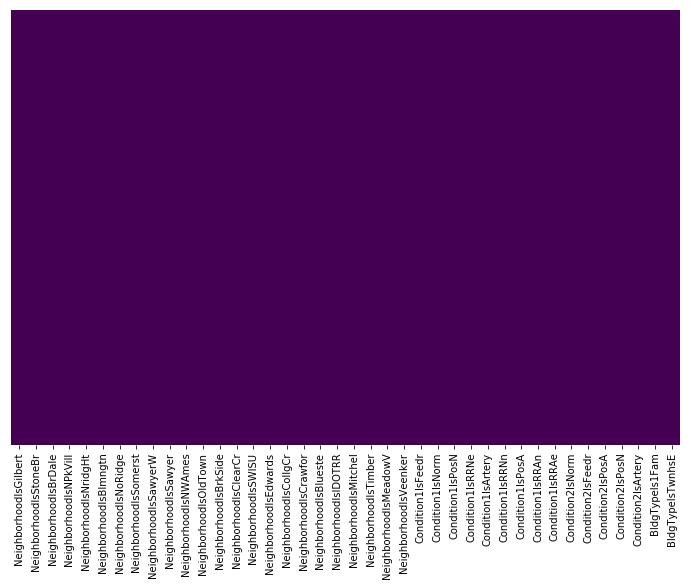

In [13]:
headers = list(df)
plt.figure(figsize=(12,8))
sns.heatmap(df.loc[:,headers[120:160]].isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.show()

In [ ]:
headers=list(df)
normalize={}
for header in headers:
    normalize[header]=(0,max(df[header].max(),1))
normalize["YrSold"] = (1864,2010)
del normalize["SalePrice"]
del normalize["Id"]

In [36]:
normalize={'LotFrontage': (0, 313.0), 'LotArea': (0, 215245), 'OverallQual': (0, 10), 'OverallCond': (0, 9), 'YearBuilt': (0, 2010), 'YearRemodAdd': (0, 2010), 'MasVnrArea': (0, 1600.0), 'BsmtFinSF1': (0, 5644), 'BsmtFinSF2': (0, 1474), 'BsmtUnfSF': (0, 2336), 'TotalBsmtSF': (0, 6110), '1stFlrSF': (0, 4692), '2ndFlrSF': (0, 2065), 'LowQualFinSF': (0, 572), 'GrLivArea': (0, 5642), 'BsmtFullBath': (0, 3), 'BsmtHalfBath': (0, 2), 'FullBath': (0, 3), 'HalfBath': (0, 2), 'BedroomAbvGr': (0, 8), 'KitchenAbvGr': (0, 3), 'TotRmsAbvGrd': (0, 14), 'Fireplaces': (0, 3), 'GarageCars': (0, 4), 'GarageArea': (0, 1418), 'WoodDeckSF': (0, 857), 'OpenPorchSF': (0, 547), 'EnclosedPorch': (0, 552), '3SsnPorch': (0, 508), 'ScreenPorch': (0, 480), 'PoolArea': (0, 738), 'MiscVal': (0, 15500), 'YrSold': (1864, 2010), 'BsmtQualIsEx': (0, 1), 'BsmtQualIsGd': (0, 1), 'BsmtQualIsTA': (0, 1), 'BsmtQualIsFa': (0, 1), 'BsmtQualIsPo': (0, 1), 'BsmtCondIsEx': (0, 1), 'BsmtCondIsGd': (0, 1), 'BsmtCondIsTA': (0, 1), 'BsmtCondIsFa': (0, 1), 'BsmtCondIsPo': (0, 1), 'BsmtExposureIsGd': (0, 1), 'BsmtExposureIsAv': (0, 1), 'BsmtExposureIsMn': (0, 1), 'BsmtExposureIsNo': (0, 1), 'BsmtFinType1IsGLQ': (0, 1), 'BsmtFinType1IsALQ': (0, 1), 'BsmtFinType1IsBLQ': (0, 1), 'BsmtFinType1IsRec': (0, 1), 'BsmtFinType1IsLwQ': (0, 1), 'BsmtFinType1IsUnf': (0, 1), 'BsmtFinType2IsGLQ': (0, 1), 'BsmtFinType2IsALQ': (0, 1), 'BsmtFinType2IsBLQ': (0, 1), 'BsmtFinType2IsRec': (0, 1), 'BsmtFinType2IsLwQ': (0, 1), 'BsmtFinType2IsUnf': (0, 1), 'FireplaceQuIsEx': (0, 1), 'FireplaceQuIsGd': (0, 1), 'FireplaceQuIsTA': (0, 1), 'FireplaceQuIsFa': (0, 1), 'FireplaceQuIsPo': (0, 1), 'GarageTypeIs2Types': (0, 1), 'GarageTypeIsAttchd': (0, 1), 'GarageTypeIsBasment': (0, 1), 'GarageTypeIsBuiltIn': (0, 1), 'GarageTypeIsCarPort': (0, 1), 'GarageTypeIsDetchd': (0, 1), 'GarageFinishIsFin': (0, 1), 'GarageFinishIsRFn': (0, 1), 'GarageFinishIsUnf': (0, 1), 'GarageQualIsEx': (0, 1), 'GarageQualIsGd': (0, 1), 'GarageQualIsTA': (0, 1), 'GarageQualIsFa': (0, 1), 'GarageQualIsPo': (0, 1), 'GarageCondIsEx': (0, 1), 'GarageCondIsGd': (0, 1), 'GarageCondIsTA': (0, 1), 'GarageCondIsFa': (0, 1), 'GarageCondIsPo': (0, 1), 'PoolQCIsEx': (0, 1), 'PoolQCIsGd': (0, 1), 'PoolQCIsTA': (0, 1), 'PoolQCIsFa': (0, 1), 'PoolQCIsPo': (0, 1), 'FenceIsGdPrv': (0, 1), 'FenceIsMnPrv': (0, 1), 'FenceIsGdWo': (0, 1), 'FenceIsMnWw': (0, 1), 'MSZoningIsRL': (0, 1), 'MSZoningIsRM': (0, 1), 'MSZoningIsC (all)': (0, 1), 'MSZoningIsFV': (0, 1), 'MSZoningIsRH': (0, 1), 'StreetIsPave': (0, 1), 'StreetIsGrvl': (0, 1), 'LotShapeIsReg': (0, 1), 'LotShapeIsIR1': (0, 1), 'LotShapeIsIR2': (0, 1), 'LotShapeIsIR3': (0, 1), 'LandContourIsLvl': (0, 1), 'LandContourIsBnk': (0, 1), 'LandContourIsLow': (0, 1), 'LandContourIsHLS': (0, 1), 'UtilitiesIsAllPub': (0, 1), 'UtilitiesIsNoSeWa': (0, 1), 'LotConfigIsInside': (0, 1), 'LotConfigIsFR2': (0, 1), 'LotConfigIsCorner': (0, 1), 'LotConfigIsCulDSac': (0, 1), 'LotConfigIsFR3': (0, 1), 'LandSlopeIsGtl': (0, 1), 'LandSlopeIsMod': (0, 1), 'LandSlopeIsSev': (0, 1), 'NeighborhoodIsCollgCr': (0, 1), 'NeighborhoodIsVeenker': (0, 1), 'NeighborhoodIsCrawfor': (0, 1), 'NeighborhoodIsNoRidge': (0, 1), 'NeighborhoodIsMitchel': (0, 1), 'NeighborhoodIsSomerst': (0, 1), 'NeighborhoodIsNWAmes': (0, 1), 'NeighborhoodIsOldTown': (0, 1), 'NeighborhoodIsBrkSide': (0, 1), 'NeighborhoodIsSawyer': (0, 1), 'NeighborhoodIsNridgHt': (0, 1), 'NeighborhoodIsNAmes': (0, 1), 'NeighborhoodIsSawyerW': (0, 1), 'NeighborhoodIsIDOTRR': (0, 1), 'NeighborhoodIsMeadowV': (0, 1), 'NeighborhoodIsEdwards': (0, 1), 'NeighborhoodIsTimber': (0, 1), 'NeighborhoodIsGilbert': (0, 1), 'NeighborhoodIsStoneBr': (0, 1), 'NeighborhoodIsClearCr': (0, 1), 'NeighborhoodIsNPkVill': (0, 1), 'NeighborhoodIsBlmngtn': (0, 1), 'NeighborhoodIsBrDale': (0, 1), 'NeighborhoodIsSWISU': (0, 1), 'NeighborhoodIsBlueste': (0, 1), 'Condition1IsNorm': (0, 1), 'Condition1IsFeedr': (0, 1), 'Condition1IsPosN': (0, 1), 'Condition1IsArtery': (0, 1), 'Condition1IsRRAe': (0, 1), 'Condition1IsRRNn': (0, 1), 'Condition1IsRRAn': (0, 1), 'Condition1IsPosA': (0, 1), 'Condition1IsRRNe': (0, 1), 'Condition2IsNorm': (0, 1), 'Condition2IsArtery': (0, 1), 'Condition2IsRRNn': (0, 1), 'Condition2IsFeedr': (0, 1), 'Condition2IsPosN': (0, 1), 'Condition2IsPosA': (0, 1), 'Condition2IsRRAn': (0, 1), 'Condition2IsRRAe': (0, 1), 'BldgTypeIs1Fam': (0, 1), 'BldgTypeIs2fmCon': (0, 1), 'BldgTypeIsDuplex': (0, 1), 'BldgTypeIsTwnhsE': (0, 1), 'BldgTypeIsTwnhs': (0, 1), 'HouseStyleIs2Story': (0, 1), 'HouseStyleIs1Story': (0, 1), 'HouseStyleIs1.5Fin': (0, 1), 'HouseStyleIs1.5Unf': (0, 1), 'HouseStyleIsSFoyer': (0, 1), 'HouseStyleIsSLvl': (0, 1), 'HouseStyleIs2.5Unf': (0, 1), 'HouseStyleIs2.5Fin': (0, 1), 'RoofStyleIsGable': (0, 1), 'RoofStyleIsHip': (0, 1), 'RoofStyleIsGambrel': (0, 1), 'RoofStyleIsMansard': (0, 1), 'RoofStyleIsFlat': (0, 1), 'RoofStyleIsShed': (0, 1), 'RoofMatlIsCompShg': (0, 1), 'RoofMatlIsWdShngl': (0, 1), 'RoofMatlIsMetal': (0, 1), 'RoofMatlIsWdShake': (0, 1), 'RoofMatlIsMembran': (0, 1), 'RoofMatlIsTar&Grv': (0, 1), 'RoofMatlIsRoll': (0, 1), 'RoofMatlIsClyTile': (0, 1), 'Exterior1stIsVinylSd': (0, 1), 'Exterior1stIsMetalSd': (0, 1), 'Exterior1stIsWd Sdng': (0, 1), 'Exterior1stIsHdBoard': (0, 1), 'Exterior1stIsBrkFace': (0, 1), 'Exterior1stIsWdShing': (0, 1), 'Exterior1stIsCemntBd': (0, 1), 'Exterior1stIsPlywood': (0, 1), 'Exterior1stIsAsbShng': (0, 1), 'Exterior1stIsStucco': (0, 1), 'Exterior1stIsBrkComm': (0, 1), 'Exterior1stIsAsphShn': (0, 1), 'Exterior1stIsStone': (0, 1), 'Exterior1stIsImStucc': (0, 1), 'Exterior1stIsCBlock': (0, 1), 'Exterior2ndIsVinylSd': (0, 1), 'Exterior2ndIsMetalSd': (0, 1), 'Exterior2ndIsWd Shng': (0, 1), 'Exterior2ndIsHdBoard': (0, 1), 'Exterior2ndIsPlywood': (0, 1), 'Exterior2ndIsWd Sdng': (0, 1), 'Exterior2ndIsCmentBd': (0, 1), 'Exterior2ndIsBrkFace': (0, 1), 'Exterior2ndIsStucco': (0, 1), 'Exterior2ndIsAsbShng': (0, 1), 'Exterior2ndIsBrk Cmn': (0, 1), 'Exterior2ndIsImStucc': (0, 1), 'Exterior2ndIsAsphShn': (0, 1), 'Exterior2ndIsStone': (0, 1), 'Exterior2ndIsOther': (0, 1), 'Exterior2ndIsCBlock': (0, 1), 'MasVnrTypeIsBrkFace': (0, 1), 'MasVnrTypeIsNone': (0, 1), 'MasVnrTypeIsStone': (0, 1), 'MasVnrTypeIsBrkCmn': (0, 1), 'ExterQualIsGd': (0, 1), 'ExterQualIsTA': (0, 1), 'ExterQualIsEx': (0, 1), 'ExterQualIsFa': (0, 1), 'ExterCondIsTA': (0, 1), 'ExterCondIsGd': (0, 1), 'ExterCondIsFa': (0, 1), 'ExterCondIsPo': (0, 1), 'ExterCondIsEx': (0, 1), 'FoundationIsPConc': (0, 1), 'FoundationIsCBlock': (0, 1), 'FoundationIsBrkTil': (0, 1), 'FoundationIsWood': (0, 1), 'FoundationIsSlab': (0, 1), 'FoundationIsStone': (0, 1), 'HeatingIsGasA': (0, 1), 'HeatingIsGasW': (0, 1), 'HeatingIsGrav': (0, 1), 'HeatingIsWall': (0, 1), 'HeatingIsOthW': (0, 1), 'HeatingIsFloor': (0, 1), 'HeatingQCIsEx': (0, 1), 'HeatingQCIsGd': (0, 1), 'HeatingQCIsTA': (0, 1), 'HeatingQCIsFa': (0, 1), 'HeatingQCIsPo': (0, 1), 'CentralAirIsY': (0, 1), 'CentralAirIsN': (0, 1), 'ElectricalIsSBrkr': (0, 1), 'ElectricalIsFuseF': (0, 1), 'ElectricalIsFuseA': (0, 1), 'ElectricalIsFuseP': (0, 1), 'ElectricalIsMix': (0, 1), 'KitchenQualIsGd': (0, 1), 'KitchenQualIsTA': (0, 1), 'KitchenQualIsEx': (0, 1), 'KitchenQualIsFa': (0, 1), 'FunctionalIsTyp': (0, 1), 'FunctionalIsMin1': (0, 1), 'FunctionalIsMaj1': (0, 1), 'FunctionalIsMin2': (0, 1), 'FunctionalIsMod': (0, 1), 'FunctionalIsMaj2': (0, 1), 'FunctionalIsSev': (0, 1), 'PavedDriveIsY': (0, 1), 'PavedDriveIsN': (0, 1), 'PavedDriveIsP': (0, 1), 'SaleTypeIsWD': (0, 1), 'SaleTypeIsNew': (0, 1), 'SaleTypeIsCOD': (0, 1), 'SaleTypeIsConLD': (0, 1), 'SaleTypeIsConLI': (0, 1), 'SaleTypeIsCWD': (0, 1), 'SaleTypeIsConLw': (0, 1), 'SaleTypeIsCon': (0, 1), 'SaleTypeIsOth': (0, 1), 'SaleConditionIsNormal': (0, 1), 'SaleConditionIsAbnorml': (0, 1), 'SaleConditionIsPartial': (0, 1), 'SaleConditionIsAdjLand': (0, 1), 'SaleConditionIsAlloca': (0, 1), 'SaleConditionIsFamily': (0, 1), 'MSSubClassIs20': (0, 1), 'MSSubClassIs30': (0, 1), 'MSSubClassIs40': (0, 1), 'MSSubClassIs45': (0, 1), 'MSSubClassIs50': (0, 1), 'MSSubClassIs60': (0, 1), 'MSSubClassIs70': (0, 1), 'MSSubClassIs75': (0, 1), 'MSSubClassIs80': (0, 1), 'MSSubClassIs85': (0, 1), 'MSSubClassIs90': (0, 1), 'MSSubClassIs120': (0, 1), 'MSSubClassIs150': (0, 1), 'MSSubClassIs160': (0, 1), 'MSSubClassIs180': (0, 1), 'MSSubClassIs190': (0, 1)}
print(normalize)

{'LotFrontage': (0, 313.0), 'LotArea': (0, 215245), 'OverallQual': (0, 10), 'OverallCond': (0, 9), 'YearBuilt': (0, 2010), 'YearRemodAdd': (0, 2010), 'MasVnrArea': (0, 1600.0), 'BsmtFinSF1': (0, 5644), 'BsmtFinSF2': (0, 1474), 'BsmtUnfSF': (0, 2336), 'TotalBsmtSF': (0, 6110), '1stFlrSF': (0, 4692), '2ndFlrSF': (0, 2065), 'LowQualFinSF': (0, 572), 'GrLivArea': (0, 5642), 'BsmtFullBath': (0, 3), 'BsmtHalfBath': (0, 2), 'FullBath': (0, 3), 'HalfBath': (0, 2), 'BedroomAbvGr': (0, 8), 'KitchenAbvGr': (0, 3), 'TotRmsAbvGrd': (0, 14), 'Fireplaces': (0, 3), 'GarageCars': (0, 4), 'GarageArea': (0, 1418), 'WoodDeckSF': (0, 857), 'OpenPorchSF': (0, 547), 'EnclosedPorch': (0, 552), '3SsnPorch': (0, 508), 'ScreenPorch': (0, 480), 'PoolArea': (0, 738), 'MiscVal': (0, 15500), 'YrSold': (1864, 2010), 'BsmtQualIsEx': (0, 1), 'BsmtQualIsGd': (0, 1), 'BsmtQualIsTA': (0, 1), 'BsmtQualIsFa': (0, 1), 'BsmtQualIsPo': (0, 1), 'BsmtCondIsEx': (0, 1), 'BsmtCondIsGd': (0, 1), 'BsmtCondIsTA': (0, 1), 'BsmtCondIsF

In [37]:
for header in normalize:
    df[header] = (1.0*df[header] - normalize[header][0]) / normalize[header][1]

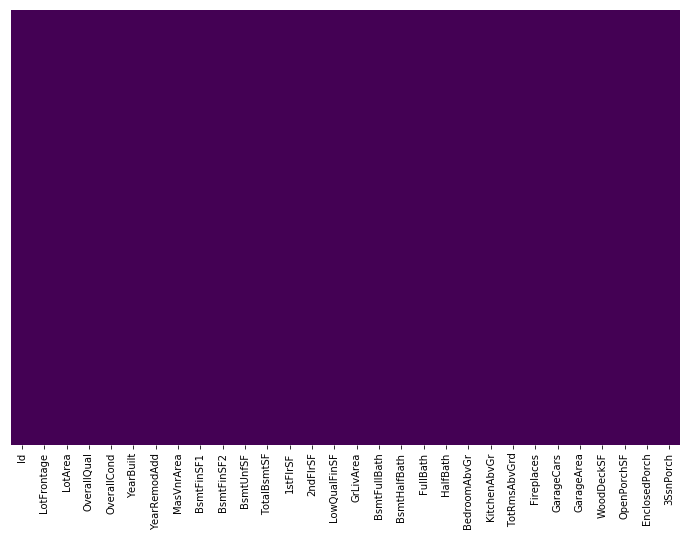

In [47]:
headers = list(df)
df["BsmtFullBath"] = df["BsmtFullBath"].fillna(0)
df["BsmtHalfBath"] = df["BsmtHalfBath"].fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(df.loc[:,headers[0:30]].isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.show()

In [48]:
df.loc[:,headers[30:40]].describe()

,ScreenPorch,PoolArea,MiscVal,YrSold,BsmtQualIsEx,BsmtQualIsGd,BsmtQualIsTA,BsmtQualIsFa,BsmtQualIsPo,BsmtCondIsEx
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0,1459.0
mean,0.035551,0.002364,0.003753,0.071527,0.093900,0.405072,0.434544,0.036326,0.0,0.0
std,0.117937,0.041317,0.040697,0.000648,0.291789,0.491074,0.495867,0.187165,0.0,0.0
min,0.000000,0.000000,0.000000,0.070647,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.000000,0.000000,0.071144,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.000000,0.000000,0.071642,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.000000,0.000000,0.000000,0.072139,0.000000,1.000000,1.000000,0.000000,0.0,0.0
max,1.200000,1.084011,1.096774,0.072637,1.000000,1.000000,1.000000,1.000000,0.0,0.0


In [61]:
goodOrder=['Id', 'Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'BsmtQualIsEx', 'BsmtQualIsGd', 'BsmtQualIsTA', 'BsmtQualIsFa', 'BsmtQualIsPo', 'BsmtCondIsEx', 'BsmtCondIsGd', 'BsmtCondIsTA', 'BsmtCondIsFa', 'BsmtCondIsPo', 'BsmtExposureIsGd', 'BsmtExposureIsAv', 'BsmtExposureIsMn', 'BsmtExposureIsNo', 'BsmtFinType1IsGLQ', 'BsmtFinType1IsALQ', 'BsmtFinType1IsBLQ', 'BsmtFinType1IsRec', 'BsmtFinType1IsLwQ', 'BsmtFinType1IsUnf', 'BsmtFinType2IsGLQ', 'BsmtFinType2IsALQ', 'BsmtFinType2IsBLQ', 'BsmtFinType2IsRec', 'BsmtFinType2IsLwQ', 'BsmtFinType2IsUnf', 'FireplaceQuIsEx', 'FireplaceQuIsGd', 'FireplaceQuIsTA', 'FireplaceQuIsFa', 'FireplaceQuIsPo', 'GarageTypeIs2Types', 'GarageTypeIsAttchd', 'GarageTypeIsBasment', 'GarageTypeIsBuiltIn', 'GarageTypeIsCarPort', 'GarageTypeIsDetchd', 'GarageFinishIsFin', 'GarageFinishIsRFn', 'GarageFinishIsUnf', 'GarageQualIsEx', 'GarageQualIsGd', 'GarageQualIsTA', 'GarageQualIsFa', 'GarageQualIsPo', 'GarageCondIsEx', 'GarageCondIsGd', 'GarageCondIsTA', 'GarageCondIsFa', 'GarageCondIsPo', 'PoolQCIsEx', 'PoolQCIsGd', 'PoolQCIsTA', 'PoolQCIsFa', 'PoolQCIsPo', 'FenceIsGdPrv', 'FenceIsMnPrv', 'FenceIsGdWo', 'FenceIsMnWw', 'MSZoningIsRL', 'MSZoningIsRM', 'MSZoningIsC (all)', 'MSZoningIsFV', 'MSZoningIsRH', 'StreetIsPave', 'StreetIsGrvl', 'LotShapeIsReg', 'LotShapeIsIR1', 'LotShapeIsIR2', 'LotShapeIsIR3', 'LandContourIsLvl', 'LandContourIsBnk', 'LandContourIsLow', 'LandContourIsHLS', 'UtilitiesIsAllPub', 'UtilitiesIsNoSeWa', 'LotConfigIsInside', 'LotConfigIsFR2', 'LotConfigIsCorner', 'LotConfigIsCulDSac', 'LotConfigIsFR3', 'LandSlopeIsGtl', 'LandSlopeIsMod', 'LandSlopeIsSev', 'NeighborhoodIsCollgCr', 'NeighborhoodIsVeenker', 'NeighborhoodIsCrawfor', 'NeighborhoodIsNoRidge', 'NeighborhoodIsMitchel', 'NeighborhoodIsSomerst', 'NeighborhoodIsNWAmes', 'NeighborhoodIsOldTown', 'NeighborhoodIsBrkSide', 'NeighborhoodIsSawyer', 'NeighborhoodIsNridgHt', 'NeighborhoodIsNAmes', 'NeighborhoodIsSawyerW', 'NeighborhoodIsIDOTRR', 'NeighborhoodIsMeadowV', 'NeighborhoodIsEdwards', 'NeighborhoodIsTimber', 'NeighborhoodIsGilbert', 'NeighborhoodIsStoneBr', 'NeighborhoodIsClearCr', 'NeighborhoodIsNPkVill', 'NeighborhoodIsBlmngtn', 'NeighborhoodIsBrDale', 'NeighborhoodIsSWISU', 'NeighborhoodIsBlueste', 'Condition1IsNorm', 'Condition1IsFeedr', 'Condition1IsPosN', 'Condition1IsArtery', 'Condition1IsRRAe', 'Condition1IsRRNn', 'Condition1IsRRAn', 'Condition1IsPosA', 'Condition1IsRRNe', 'Condition2IsNorm', 'Condition2IsArtery', 'Condition2IsRRNn', 'Condition2IsFeedr', 'Condition2IsPosN', 'Condition2IsPosA', 'Condition2IsRRAn', 'Condition2IsRRAe', 'BldgTypeIs1Fam', 'BldgTypeIs2fmCon', 'BldgTypeIsDuplex', 'BldgTypeIsTwnhsE', 'BldgTypeIsTwnhs', 'HouseStyleIs2Story', 'HouseStyleIs1Story', 'HouseStyleIs1.5Fin', 'HouseStyleIs1.5Unf', 'HouseStyleIsSFoyer', 'HouseStyleIsSLvl', 'HouseStyleIs2.5Unf', 'HouseStyleIs2.5Fin', 'RoofStyleIsGable', 'RoofStyleIsHip', 'RoofStyleIsGambrel', 'RoofStyleIsMansard', 'RoofStyleIsFlat', 'RoofStyleIsShed', 'RoofMatlIsCompShg', 'RoofMatlIsWdShngl', 'RoofMatlIsMetal', 'RoofMatlIsWdShake', 'RoofMatlIsMembran', 'RoofMatlIsTar&Grv', 'RoofMatlIsRoll', 'RoofMatlIsClyTile', 'Exterior1stIsVinylSd', 'Exterior1stIsMetalSd', 'Exterior1stIsWd Sdng', 'Exterior1stIsHdBoard', 'Exterior1stIsBrkFace', 'Exterior1stIsWdShing', 'Exterior1stIsCemntBd', 'Exterior1stIsPlywood', 'Exterior1stIsAsbShng', 'Exterior1stIsStucco', 'Exterior1stIsBrkComm', 'Exterior1stIsAsphShn', 'Exterior1stIsStone', 'Exterior1stIsImStucc', 'Exterior1stIsCBlock', 'Exterior2ndIsVinylSd', 'Exterior2ndIsMetalSd', 'Exterior2ndIsWd Shng', 'Exterior2ndIsHdBoard', 'Exterior2ndIsPlywood', 'Exterior2ndIsWd Sdng', 'Exterior2ndIsCmentBd', 'Exterior2ndIsBrkFace', 'Exterior2ndIsStucco', 'Exterior2ndIsAsbShng', 'Exterior2ndIsBrk Cmn', 'Exterior2ndIsImStucc', 'Exterior2ndIsAsphShn', 'Exterior2ndIsStone', 'Exterior2ndIsOther', 'Exterior2ndIsCBlock', 'MasVnrTypeIsBrkFace', 'MasVnrTypeIsNone', 'MasVnrTypeIsStone', 'MasVnrTypeIsBrkCmn', 'ExterQualIsGd', 'ExterQualIsTA', 'ExterQualIsEx', 'ExterQualIsFa', 'ExterCondIsTA', 'ExterCondIsGd', 'ExterCondIsFa', 'ExterCondIsPo', 'ExterCondIsEx', 'FoundationIsPConc', 'FoundationIsCBlock', 'FoundationIsBrkTil', 'FoundationIsWood', 'FoundationIsSlab', 'FoundationIsStone', 'HeatingIsGasA', 'HeatingIsGasW', 'HeatingIsGrav', 'HeatingIsWall', 'HeatingIsOthW', 'HeatingIsFloor', 'HeatingQCIsEx', 'HeatingQCIsGd', 'HeatingQCIsTA', 'HeatingQCIsFa', 'HeatingQCIsPo', 'CentralAirIsY', 'CentralAirIsN', 'ElectricalIsSBrkr', 'ElectricalIsFuseF', 'ElectricalIsFuseA', 'ElectricalIsFuseP', 'ElectricalIsMix', 'KitchenQualIsGd', 'KitchenQualIsTA', 'KitchenQualIsEx', 'KitchenQualIsFa', 'FunctionalIsTyp', 'FunctionalIsMin1', 'FunctionalIsMaj1', 'FunctionalIsMin2', 'FunctionalIsMod', 'FunctionalIsMaj2', 'FunctionalIsSev', 'PavedDriveIsY', 'PavedDriveIsN', 'PavedDriveIsP', 'SaleTypeIsWD', 'SaleTypeIsNew', 'SaleTypeIsCOD', 'SaleTypeIsConLD', 'SaleTypeIsConLI', 'SaleTypeIsCWD', 'SaleTypeIsConLw', 'SaleTypeIsCon', 'SaleTypeIsOth', 'SaleConditionIsNormal', 'SaleConditionIsAbnorml', 'SaleConditionIsPartial', 'SaleConditionIsAdjLand', 'SaleConditionIsAlloca', 'SaleConditionIsFamily', 'MSSubClassIs20', 'MSSubClassIs30', 'MSSubClassIs40', 'MSSubClassIs45', 'MSSubClassIs50', 'MSSubClassIs60', 'MSSubClassIs70', 'MSSubClassIs75', 'MSSubClassIs80', 'MSSubClassIs85', 'MSSubClassIs90', 'MSSubClassIs120', 'MSSubClassIs150', 'MSSubClassIs160', 'MSSubClassIs180', 'MSSubClassIs190']

In [62]:
df.loc[:,goodOrder].to_csv("betterTest.csv",index=False)

In [63]:
df2 = pd.read_csv("betterTest.csv")
headers=list(df2)
for header in headers:
    if df2[header].count() < 1459:
        print(header)
        df2[header]=df2[header].fillna(0)

BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
GarageCars
GarageArea


In [64]:
headers=list(df2)
for header in headers:
    if df2[header].count() < 1459:
        print(header)

In [65]:
df2.to_csv("betterTest.csv",index=False)